In [107]:
# !pip install geopandas 

In [108]:
# !pip install matplotlib


In [109]:
# %pip install pygeos

In [110]:
# %pip install rtree

In [1]:
# All the import Libraries
import pandas as pd
import geopandas as gp
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

In [2]:
# read files
data = gp.read_file("../data/geo_data_trees.geojson")
polydata = gp.read_file("../data/circoscrizioni.json")

In [3]:
data

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,2.8,3.5,1,1.5,1.8,3.5,0.2,46.051599,11.072014,POINT (11.07201 46.05160)
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,3,5,1.5,1.5,1.8,4.2,0.3,46.051541,11.072108,POINT (11.07211 46.05154)
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,3.4,4.5,1.3,1.5,1.8,4,0.3,46.051668,11.071959,POINT (11.07196 46.05167)
3,4.0,Acer pseudoplatanus,11,482.46,25.7,4.13,1.6,0.26,0,0.02,...,4.3,5,1.5,2.5,4.9,7.1,0.5,46.063778,11.150170,POINT (11.15017 46.06378)
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,29.5,8,2.4,1.5,1.8,6.6,1.5,46.052305,11.071550,POINT (11.07155 46.05230)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)
12511,17667.0,Osmanthus fragrans,28.2,1354.8,240.7,38.67,4.3,0.6899999999999999,0.1,0.15,...,11.5,2.5,0.8,5.3,21.7,43.3,3.8,46.053467,11.121152,POINT (11.12115 46.05347)


<AxesSubplot: >

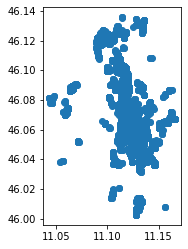

In [8]:
%matplotlib inline
data.plot()

In [4]:
data.columns

Index(['Tree ID', 'Name', 'DBH (cm)', 'Replacement Value (eur)',
       'Carbon Storage (kg)', 'Carbon Storage (eur)',
       'Gross Carbon Sequestration (kg/yr)',
       'Gross Carbon Sequestration (eur/yr)', 'Avoided Runoff (mcube/yr)',
       'Avoided Runoff (eur/yr)', 'Carbon Avoided (kg/yr)',
       'Carbon Avoided (eur/yr)', 'Pollution Removal (g/yr)',
       'Pollution Removal (eur/yr)', 'Energy Savings (eur/yr)',
       'Total Annual Benefits (eur/yr)', 'Oxygen Production (kg/yr)',
       'Height (m)', 'Crown Height (m)', 'Crown Width (m)',
       'Canopy Cover (m2)', 'Leaf Area (m2)', 'Leaf Biomass (kg)', 'Latitude',
       'Longitude', 'geometry'],
      dtype='object')

In [9]:
polydata


,numero_cir,area,perimetro,nome,fumetto,geometry
0,2,15712181,17850,MEANO,Circoscrizione n. 2 - MEANO,"POLYGON ((11.15678 46.11661, 11.15687 46.11666..."
1,3,36949609,38485,BONDONE,Circoscrizione n. 3 - BONDONE,"POLYGON ((11.08026 46.11571, 11.08026 46.11571..."
2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,"POLYGON ((11.09034 46.07917, 11.09032 46.07899..."
3,6,13199398,20575,ARGENTARIO,Circoscrizione n. 6 - ARGENTARIO,"POLYGON ((11.17163 46.08095, 11.17161 46.08106..."
4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,"POLYGON ((11.11135 46.05878, 11.11137 46.05878..."
5,7,15433274,18464,POVO,Circoscrizione n. 7 - POVO,"POLYGON ((11.18467 46.02957, 11.18467 46.02957..."
6,5,16687779,27197,RAVINA-ROMAGNANO,Circoscrizione n. 5 - RAVINA-ROMAGNANO,"POLYGON ((11.11591 45.98873, 11.11597 45.98890..."
7,8,16409555,24413,MATTARELLO,Circoscrizione n. 8 - MATTARELLO,"POLYGON ((11.11591 45.98873, 11.11644 45.98845..."
8,9,7342864,15395,VILLAZZANO,Circoscrizione n. 9 - VILLAZZANO,"POLYGON ((11.15706 46.01669, 11.15723 46.01684..."
9,10,6962104,15418,OLTREFERSINA,Circoscrizione n. 10 - OLTREFERSINA,"POLYGON ((11.11723 46.04331, 11.11754 46.04306..."


<AxesSubplot: >

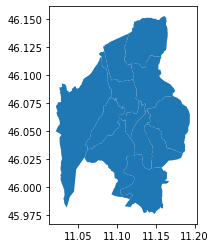

In [10]:
polydata.plot()

In [11]:
# 12513 rows × 26 columns
# Basic information about all the columns of the data
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Tree ID                              12512 non-null  float64 
 1   Name                                 12513 non-null  object  
 2   DBH (cm)                             12512 non-null  object  
 3   Replacement Value (eur)              12513 non-null  object  
 4   Carbon Storage (kg)                  12513 non-null  object  
 5   Carbon Storage (eur)                 12513 non-null  object  
 6   Gross Carbon Sequestration (kg/yr)   12513 non-null  object  
 7   Gross Carbon Sequestration (eur/yr)  12513 non-null  object  
 8   Avoided Runoff (mcube/yr)            12513 non-null  object  
 9   Avoided Runoff (eur/yr)              12513 non-null  object  
 10  Carbon Avoided (kg/yr)               0 non-null      object  
 11  Carbon 

In [12]:
#These column shows that there is some values missing in one row
# Tree ID, DBH (cm), Height (m), Crown Height (m), 
# Crown Width (m), Latitude, Longitude, 
# geometry

In [13]:
data.tail()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)
12511,17667.0,Osmanthus fragrans,28.2,1354.8,240.7,38.67,4.3,0.6899999999999999,0.1,0.15,...,11.5,2.5,0.8,5.3,21.7,43.3,3.8,46.053467,11.121152,POINT (11.12115 46.05347)
12512,NaN,Total,None,23086243,5484735,881216,71714,11522,2270,4317,...,191237.8,None,None,None,382146.7,1241575.9,101770.6,NaN,NaN,None


In [14]:
# deleting the last row
data = data.drop(data.index[-1])

In [15]:
# the last row is the total row for all the data so should be avoided 
# when including in the data values.
data.tail()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
12507,17663.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.15,...,28.4,2.5,0.8,5.3,21.7,43.6,3.3,46.055912,11.129441,POINT (11.12944 46.05591)
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)
12511,17667.0,Osmanthus fragrans,28.2,1354.8,240.7,38.67,4.3,0.6899999999999999,0.1,0.15,...,11.5,2.5,0.8,5.3,21.7,43.3,3.8,46.053467,11.121152,POINT (11.12115 46.05347)


In [16]:
data.value_counts("Name").nlargest(10)

Name
Celtis australis          1028
Aesculus hippocastanum     581
Carpinus betulus           536
Tilia cordata              509
Platanus x hispanica       502
Tilia x europaea           471
Acer campestre             458
Cupressus                  399
Sophora japonica           376
Prunus cerasifera          350
dtype: int64

In [17]:
# data.groupby('Name').mean()

In [18]:
# To display complete values of the coulmns 
# with pd.option_context('display.max_colwidth', None, 'display.max_rows', None): display(polydata)

In [19]:
# selection = polydata

# # Iterate over rows and print the area of a Polygon
# for index, row in selection.iterrows():
#     # Get the area of the polygon
#     poly_area = row['geometry'].area
#     # Print information for the user
#     print("Polygon area at index {index} is: {area:.3f}".format(index=index, area=poly_area))

In [112]:
# polydata.sort_values("numero_cir")

In [113]:
print(polydata["geometry"])

0     POLYGON ((11.15678 46.11661, 11.15687 46.11666...
1     POLYGON ((11.08026 46.11571, 11.08026 46.11571...
2     POLYGON ((11.09034 46.07917, 11.09032 46.07899...
3     POLYGON ((11.17163 46.08095, 11.17161 46.08106...
4     POLYGON ((11.11135 46.05878, 11.11137 46.05878...
5     POLYGON ((11.18467 46.02957, 11.18467 46.02957...
6     POLYGON ((11.11591 45.98873, 11.11597 45.98890...
7     POLYGON ((11.11591 45.98873, 11.11644 45.98845...
8     POLYGON ((11.15706 46.01669, 11.15723 46.01684...
9     POLYGON ((11.11723 46.04331, 11.11754 46.04306...
10    POLYGON ((11.11614 46.10914, 11.11606 46.10909...
11    POLYGON ((11.12826 46.07593, 11.12802 46.07610...
Name: geometry, dtype: geometry


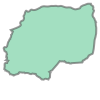

In [114]:
poly1 = polydata["geometry"][0]
poly1

In [23]:
# checking the cordinates reference system is same for both the files
polydata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [116]:
# print(data.dtypes)
# print(polydata.dtypes)

In [27]:

# Group the data by column 
grouped = data.groupby('Name')

# Let's see what we have
grouped

In [28]:
grouped.head()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,2.8,3.5,1,1.5,1.8,3.5,0.2,46.051599,11.072014,POINT (11.07201 46.05160)
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,3,5,1.5,1.5,1.8,4.2,0.3,46.051541,11.072108,POINT (11.07211 46.05154)
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,3.4,4.5,1.3,1.5,1.8,4,0.3,46.051668,11.071959,POINT (11.07196 46.05167)
3,4.0,Acer pseudoplatanus,11,482.46,25.7,4.13,1.6,0.26,0,0.02,...,4.3,5,1.5,2.5,4.9,7.1,0.5,46.063778,11.150170,POINT (11.15017 46.06378)
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,29.5,8,2.4,1.5,1.8,6.6,1.5,46.052305,11.071550,POINT (11.07155 46.05230)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12507,17663.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.15,...,28.4,2.5,0.8,5.3,21.7,43.6,3.3,46.055912,11.129441,POINT (11.12944 46.05591)
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)


In [29]:
# # Iterate over the group object
# for key, values in grouped:
#     individual_Tree = values

# # Let's see what is the LAST item and key that we iterated
# print('Key:', key)
# print(individual_Tree)

In [30]:
data["Canopy Cover (m2)"]

0         1.8
1         1.8
2         1.8
3         4.9
4         1.8
         ... 
12507    21.7
12508    21.7
12509    21.7
12510    21.7
12511    21.7
Name: Canopy Cover (m2), Length: 12512, dtype: object

In [31]:
data['canopy_cov'] = data['Canopy Cover (m2)'].astype(float)

In [32]:
data['canopy_cov']

0         1.8
1         1.8
2         1.8
3         4.9
4         1.8
         ... 
12507    21.7
12508    21.7
12509    21.7
12510    21.7
12511    21.7
Name: canopy_cov, Length: 12512, dtype: float64

In [33]:
data_converted = data[['canopy_cov','Name']].groupby('Name').mean()

In [34]:
data.value_counts("Name")

Name
Celtis australis          1028
Aesculus hippocastanum     581
Carpinus betulus           536
Tilia cordata              509
Platanus x hispanica       502
                          ... 
Syringa vulgaris             1
Lagerstroemia                1
Catalpa                      1
Prunus amygdalus             1
Cornus nuttallii             1
Length: 224, dtype: int64

In [35]:
data_converted['count'] = data.value_counts("Name")

In [36]:
data_converted

,canopy_cov,count
Name,,
Abies,23.475000,8
Abies alba,29.080645,31
Abies nordmanniana,28.300000,1
Abies pinsapo,63.600000,1
Acacia,78.500000,1
...,...,...
Viburnum,21.700000,2
Viburnum sieboldii,21.700000,2
Wisteria sinensis,21.700000,4


In [117]:
data_converted = data_converted.sort_values(by=['count'], ascending=False)

In [118]:
data_converted.head(10)

,canopy_cov,count
Name,,
Celtis australis,42.336187,1028
Aesculus hippocastanum,40.886919,581
Carpinus betulus,13.545896,536
Tilia cordata,19.849116,509
Platanus x hispanica,102.362749,502
Tilia x europaea,33.697877,471
Acer campestre,11.875764,458
Cupressus,4.490727,399
Sophora japonica,39.656649,376


In [120]:
tenHighestTreeTypes = data_converted.head(10)

In [121]:
tenHighestTreeTypes.to_csv (r'E:\Documents\GitHub\Data-Visualization\data\export_data.csv', index = True, header=True)

In [38]:
# add the "other" row and sum all the rest of the tree type values in its value
data_converted.iloc[9:,:].sum().count

<bound method Series.count of canopy_cov    5746.193964
count         7652.000000
dtype: float64>

In [40]:
points = data["geometry"]

In [41]:
polydata[polydata.contains(points[0])]

,numero_cir,area,perimetro,nome,fumetto,geometry
2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,"POLYGON ((11.09034 46.07917, 11.09032 46.07899..."


In [42]:
join = gp.sjoin(data, polydata, how="inner", predicate="within")

In [43]:
join.rename(columns={'nome': 'Region'}, inplace=True)
join

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Latitude,Longitude,geometry,canopy_cov,index_right,numero_cir,area,perimetro,Region,fumetto
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,46.051599,11.072014,POINT (11.07201 46.05160),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,46.051541,11.072108,POINT (11.07211 46.05154),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,46.051668,11.071959,POINT (11.07196 46.05167),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,46.052305,11.071550,POINT (11.07155 46.05230),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
5,8.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,46.052002,11.071766,POINT (11.07177 46.05200),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12499,17655.0,Picea,34.3,2048.48,719,115.52,14.3,2.3,0.1,0.24,...,46.053503,11.121614,POINT (11.12161 46.05350),21.0,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA
12503,17659.0,Spiraea,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.14,...,46.053502,11.121604,POINT (11.12160 46.05350),21.7,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA
12504,17660.0,Rhododendron obtusum,28.2,1354.8,465.3,74.77,8.5,1.37,0.1,0.17,...,46.055628,11.119373,POINT (11.11937 46.05563),21.7,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA
12505,17661.0,Pittosporum tobira,28.2,1354.8,396.4,63.69,7.4,1.19,0,0.02,...,46.053461,11.121107,POINT (11.12111 46.05346),3.1,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA


In [44]:
join.head()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Latitude,Longitude,geometry,canopy_cov,index_right,numero_cir,area,perimetro,Region,fumetto
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,46.051599,11.072014,POINT (11.07201 46.05160),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,46.051541,11.072108,POINT (11.07211 46.05154),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,46.051668,11.071959,POINT (11.07196 46.05167),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,46.052305,11.071550,POINT (11.07155 46.05230),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA
5,8.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,46.052002,11.071766,POINT (11.07177 46.05200),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA


In [46]:
join.to_csv (r'E:\Documents\GitHub\Data-Visualization\data\merged_tree_and_region.csv', index = False, header=True)


In [47]:
stackeddata = join[["Name", "Region"]]


In [48]:
stackeddata['count'] = 1

C:\Users\dell\AppData\Local\Temp\ipykernel_22636\283453006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stackeddata['count'] = 1


In [49]:
stackeddata

,Name,Region,count
0,Acer pseudoplatanus,SARDAGNA,1
1,Acer pseudoplatanus,SARDAGNA,1
2,Acer pseudoplatanus,SARDAGNA,1
4,Cupressus,SARDAGNA,1
5,Acer pseudoplatanus,SARDAGNA,1
...,...,...,...
12499,Picea,S.GIUSEPPE-S.CHIARA,1
12503,Spiraea,S.GIUSEPPE-S.CHIARA,1
12504,Rhododendron obtusum,S.GIUSEPPE-S.CHIARA,1
12505,Pittosporum tobira,S.GIUSEPPE-S.CHIARA,1


In [149]:
# grouped_single = stackeddata.groupby('Name').agg({'count': ["sum"]})
grouped_region_data = stackeddata.groupby(['Region', 'Name'])['count'].sum() #.sort_values(ascending=False) #.unstack().fillna(0)
grouped_region_data

Region      Name               
ARGENTARIO  Abies alba              1
            Acer campestre         34
            Acer negundo            2
            Acer platanoides       13
            Acer pseudoplatanus     4
                                   ..
VILLAZZANO  Taxus baccata           3
            Tilia cordata          35
            Tilia x europaea       10
            Ulmus                   1
            Viburnum sieboldii      2
Name: count, Length: 854, dtype: int64

In [184]:
grouped_treetype_data = stackeddata.groupby(['Name', 'Region'])['count'].sum()
type(grouped_treetype_data)

pandas.core.series.Series

In [186]:
grouped_treetype_data


KeyError: False

In [148]:
grouped_treetype_data = grouped_treetype_data.to_frame()
grouped_treetype_data

count
Name                 Region                             
Abies                OLTREFERSINA                      8
Abies alba           ARGENTARIO                        1
                     CENTRO STORICO PIEDICASTELLO     19
                     MATTARELLO                        2
                     MEANO                             1
...                                                  ...
Wisteria sinensis    CENTRO STORICO PIEDICASTELLO      1
                     GARDOLO                           1
                     MATTARELLO                        2
Zanthoxylum flavum   OLTREFERSINA                      1
Zelkova carpinifolia CENTRO STORICO PIEDICASTELLO      5

[854 rows x 1 columns]

In [150]:
TopFiveTreesTypes = data_converted.head(5)
TopFiveTreesTypes = TopFiveTreesTypes.index.values.tolist() 
TopFiveTreesTypes

['Celtis australis',
 'Aesculus hippocastanum',
 'Carpinus betulus',
 'Tilia cordata',
 'Platanus x hispanica']

In [151]:
grouped_region_data = grouped_region_data.to_frame()
grouped_region_data

count
Region     Name                      
ARGENTARIO Abies alba               1
           Acer campestre          34
           Acer negundo             2
           Acer platanoides        13
           Acer pseudoplatanus      4
...                               ...
VILLAZZANO Taxus baccata            3
           Tilia cordata           35
           Tilia x europaea        10
           Ulmus                    1
           Viburnum sieboldii       2

[854 rows x 1 columns]

In [183]:
sorted_gpby_TreeType = sorted_gpby.groupby("Name")
sorted_gpby_TreeType.head()

count
Region                       Name                         
S.GIUSEPPE-S.CHIARA          Aesculus hippocastanum    405
OLTREFERSINA                 Celtis australis          341
CENTRO STORICO PIEDICASTELLO Celtis australis          242
GARDOLO                      Tilia cordata             216
S.GIUSEPPE-S.CHIARA          Cupressus                 212
...                                                    ...
OLTREFERSINA                 Calocedrus decurrens        1
                             Berberis thunbergii         1
                             Arbutus unedo               1
                             Alnus glutinosa             1
                             Alnus                       1

[677 rows x 1 columns]

In [182]:
dataTopFiveTreeTypes = [grouped_treetype_data.get_group(x) for x in TopFiveTreesTypes]
dataTopFiveTreeTypes

AttributeError: 'Series' object has no attribute 'get_group'

In [174]:
type(dataTopFiveTreeTypes

list

In [171]:
dataTopFiveTreeTypes.to_csv (r'E:\Documents\GitHub\Data-Visualization\data\TopFiveTreeTypesData.csv')

PermissionError: [Errno 13] Permission denied: 'E:\\Documents\\GitHub\\Data-Visualization\\data\\TopFiveTreeTypesData.csv'

In [152]:
sorted_gpby_region= grouped_region_data.sort_values("count", ascending=False)

In [153]:
sorted_gpby_region = sorted_gpby.groupby("Region")

In [81]:
Region_Lst = polydata["nome"]

result = [sorted_gpby.get_group(x) for x in polydata["nome"]]
# result = pd.DataFrame(result)
# Region_Lst
# sorted_gpby.get_group('ARGENTARIO')

In [82]:
result

[                               count
 Region Name                         
 MEANO  Quercus robur              33
        Cupressus                  20
        Fagus sylvatica            19
        Tilia x europaea           19
        Acer pseudoplatanus        16
        Pyrus calleryana           14
        Prunus avium                9
        Platanus x hispanica        9
        Celtis australis            9
        Betula pendula              6
        Cedrus libani               5
        Alnus incana                5
        Populus alba                4
        Fraxinus excelsior          4
        Fagus                       3
        Cupressus sempervirens      3
        Picea abies                 3
        Carpinus betulus            2
        Davidia involucrata         2
        Fraxinus angustifolia       2
        Malus floribunda            2
        Sorbus torminalis           2
        Acer palmatum               1
        Quercus petraea             1
        Pter

In [90]:
total_TreesPerRegion = sorted_gpby.groupby("Region").sum()

In [91]:
total_TreesPerRegion

,count
Region,
ARGENTARIO,454
BONDONE,292
CENTRO STORICO PIEDICASTELLO,2964
GARDOLO,1651
MATTARELLO,264
MEANO,206
OLTREFERSINA,2695
POVO,189
RAVINA-ROMAGNANO,319


In [92]:
sorted_gpby


count
Region                       Name                         
S.GIUSEPPE-S.CHIARA          Aesculus hippocastanum    405
OLTREFERSINA                 Celtis australis          341
CENTRO STORICO PIEDICASTELLO Celtis australis          242
GARDOLO                      Tilia cordata             216
S.GIUSEPPE-S.CHIARA          Cupressus                 212
...                                                    ...
OLTREFERSINA                 Berberis thunbergii         1
                             Arbutus unedo               1
                             Alnus glutinosa             1
                             Alnus                       1
MEANO                        Ulmus minor                 1

[854 rows x 1 columns]

In [ ]:
# To display complete values of the coulmns 
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None): display(grouped_region_data)

In [ ]:
grouped_region_data.to_csv (r'E:\Documents\GitHub\Data-Visualization\data\grouped_region_data.csv', index = True, header=True)